# Final Project
---

For your final assignment, you are tasked with building a predictive model for the movie ratings in the MovieLens 1M dataset. You may download the dataset here: https://grouplens.org/datasets/movielens/1m/. This is a dataset containing 1 million movie ratings, with side information about the users and movies. 

You will write an essay detailing your model implementation and results on this dataset. First, you will split the data into a 80% training data set and a 20% held-out test data set. Then, you will propose a model to fit to the data for this problem and implement it yourself. Please explain why you chose to use your proposed model. You should use the ideas taught in the class to inform your analysis. Explain any model selection procedures you use in this assignment. Finally, report the test set MSE of your model's predictions on the test set ratings and conclude your essay properly. There is no page minimum for the essay, but there is a maximum of 10 pages (using regular formatting like 2.5cm margins, 12pt font, A4 size. The page limit includes any graphs / figures / etc.). Your writing must be coherent and organized. If you are unsure how to organize a paper, please follow this example for what a proper essay will look like: https://jgscott.github.io/teaching/writeups/write_ups/. 

For this assignment, you must submit a Jupyter notebook containing your code. You must ensure the code you submit in this assignment runs properly and can generate all the figures and results you mention in your essay. **YOU MAY NOT USE PREWRITTEN PACKAGES FOR FITTING THE DATA TO THE MODEL, MEANING YOU MUST WRITE YOUR OWN IMPLEMENTATION**. You may reuse code that you have previously written, or code from your tutorial sessions. However, you are permitted to use any of the functions available in numpy, scipy, pandas or pytorch, This includes the optimization and linear algebra packages in the previously named packages. Additionally, you can use some of the preprocessing packages in sklearn, if you think you will need it. You may not use any of the test data to help train the model. You should write your code in the form of a neatly organized object, like you have done in your previous HW assignments. 

Your submission for this assignment will be your Jupyter notebook containing your code and a .pdf file containing your essay. Due to the tight deadlines with the final marks, **NO EXTENSIONS WILL BE GRANTED**. Students are reminded to acquaint themselves with the HKU policies on academic dishonesty in order to avoid any problems with plagiarism.

Your implementation may only use the packages below:

In [14]:
# YOU MAY ONLY USE THE FOLLOWING PACKAGES
import numpy as np
import scipy as sp
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

You must use the following code to load the data and split the ratings matrix into a training and test set.

In [15]:
# DO NOT MODIFY ANY OF THE CODE IN THIS BLOCK
rating_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']
movie_names  = ['MovieID', 'Title', 'Genres']
user_names   = ['UserID','Gender','Age','Occupation','Zip-code']
ratings      = pd.read_csv("ratings.dat", delimiter="::", names=rating_names, engine="python", encoding='latin-1')
movies       = pd.read_csv("movies.dat", delimiter="::", names=movie_names, engine="python", encoding='latin-1')
users        = pd.read_csv("users.dat", delimiter="::", names=user_names, engine="python", encoding='latin-1')
train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=0)

You may inspect the data using the head() function.

In [16]:
train_ratings.head()

,UserID,MovieID,Rating,Timestamp
37222,253,3418,3,976688190
145484,935,1954,5,976669675
345747,2029,3034,4,974670594
358642,2098,356,4,974652753
562909,3463,1240,4,967174968


In [17]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [19]:
#create ratings matrix to store ratings for further manipulation
ratings_matrix=train_ratings.pivot_table(index='UserID',columns='MovieID',values='Rating',fill_value=0)

#print out matrix to check
print(ratings_matrix)

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      0.0   0.0   0.0   2.0   0.0   3.0   0.0   0.0   0.0   0.0  ...   
6037      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6040      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

MovieID  39

In [20]:
#removing user bias
#calculate user mean
user_mean=np.nanmean(ratings_matrix.replace(0,np.nan),axis=1)
#replace all empty cells (that was rated 0) with mean prediction
ratings_matrix_filled=ratings_matrix.copy()
for i in range(ratings_matrix.shape[0]):
    ratings_matrix_filled.iloc[i].replace(0,user_mean[i],inplace=True)

#this time do not use filled matrix
#center the matrix to avoid user bias
ratings_matrix_user_centered=ratings_matrix-user_mean.reshape(-1,1)

#do not force negative excess scores=0
# ratings_matrix_user_centered[ratings_matrix_user_centered<0]=0

#centered matrix
# user_mean=np.array(np.mean(ratings_matrix,axis=1))
# ratings_matrix_user_centered=ratings_matrix-user_mean[:,np.newaxis]

In [21]:
print(ratings_matrix)
print(ratings_matrix_filled)
print(ratings_matrix_user_centered)

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      0.0   0.0   0.0   2.0   0.0   3.0   0.0   0.0   0.0   0.0  ...   
6037      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6040      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

MovieID  39

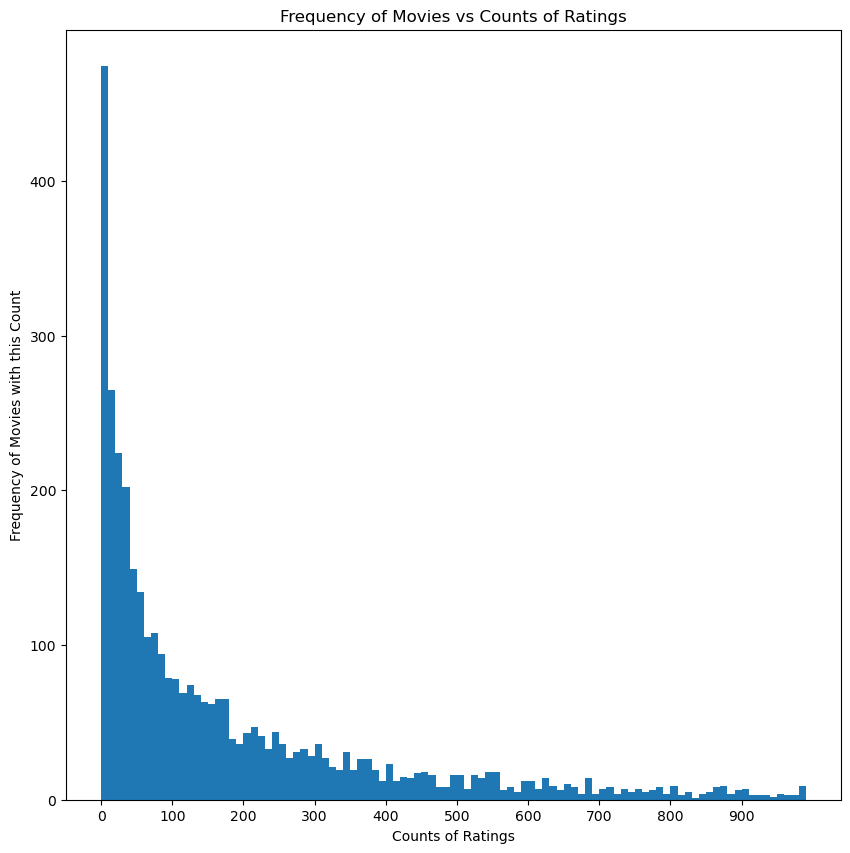

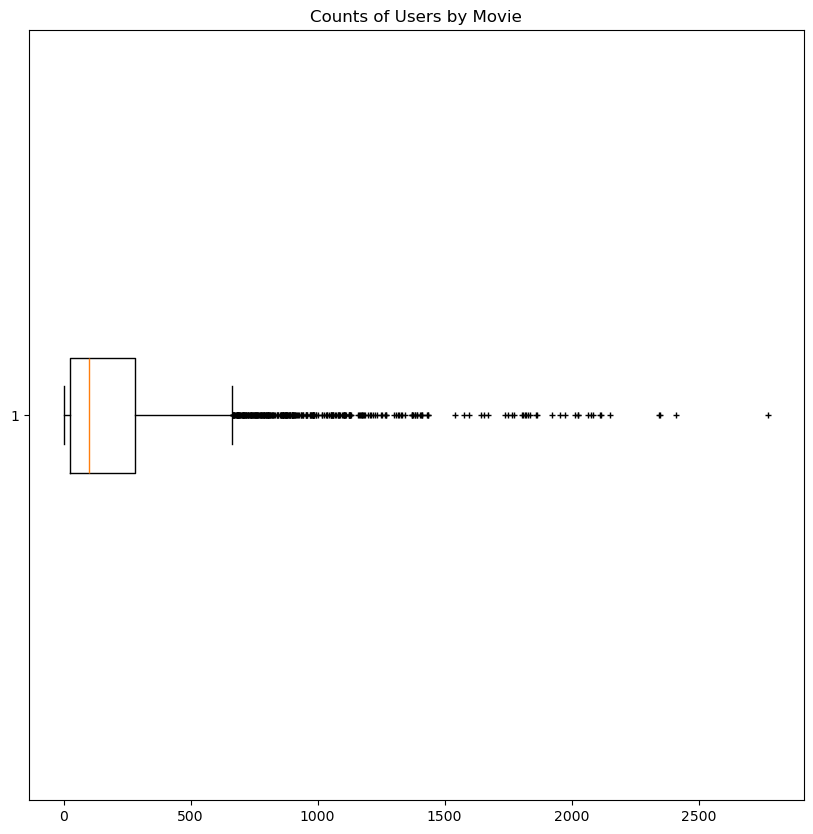

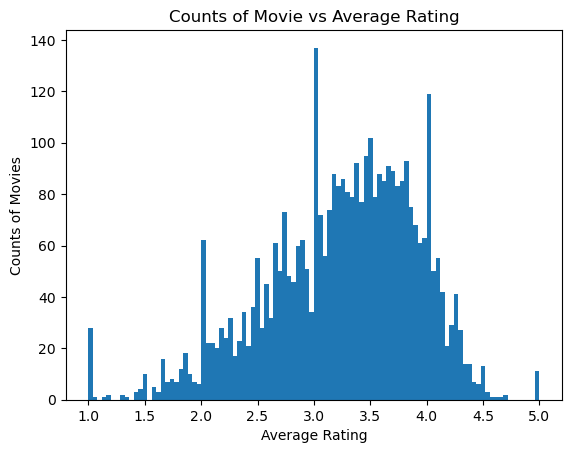

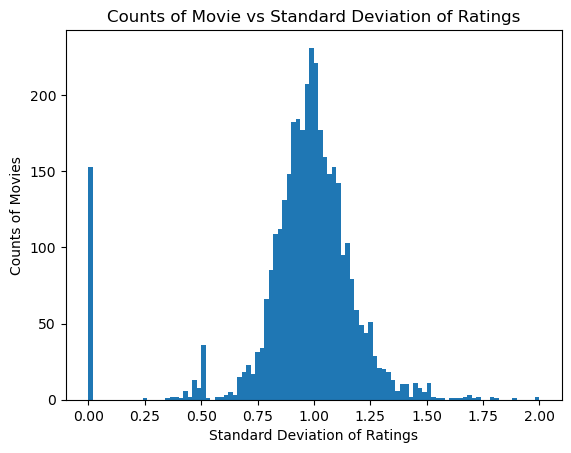

In [22]:
#study on numbers of ratings per movie
#this looks at the dsitribution of ratings of each movie

import matplotlib.pyplot as plt
#set plot size
plt.figure(figsize=(10,10))
#plot looks at the number of users rating each movie
plt.hist(np.sum(ratings_matrix.astype(bool).astype(int),axis=0),bins=np.arange(0,1000,10)) 
# plt.bar(ratings_matrix.columns.values,np.sum(ratings_matrix.astype(bool).astype(int),axis=0))
plt.xticks(np.arange(0,1000,100))
plt.xlabel("Counts of Ratings")
plt.ylabel("Frequency of Movies with this Count")
plt.title("Frequency of Movies vs Counts of Ratings")
plt.show()

#plot out boxplot of number of users rating each movie
plt.figure(figsize=(10,10))
plt.boxplot(np.sum(ratings_matrix.astype(bool).astype(int),axis=0),vert=False,flierprops=dict(marker='+', markersize=4))
plt.title("Counts of Users by Movie")
plt.show()

#plot out average rating for movies
plt.hist(np.nanmean(ratings_matrix.replace(0,np.nan),axis=0),bins=100)
plt.xlabel("Average Rating")
plt.ylabel("Counts of Movies")
plt.title("Counts of Movie vs Average Rating")
plt.show()

#plot out standard deviation of movie ratings
plt.hist(np.nanstd(ratings_matrix.replace(0,np.nan),axis=0),bins=100)
plt.xlabel("Standard Deviation of Ratings")
plt.ylabel("Counts of Movies")
plt.title("Counts of Movie vs Standard Deviation of Ratings")
plt.show()

In [23]:
#build recommender system for data
class Recommender:
    def __init__(self,ratings_matrix):
        #store the rating matrix
        self.ratings_matrix=ratings_matrix

        #replace all empty cells (that was rated 0) with mean prediction
        ratings_matrix_filled=ratings_matrix.copy()
        for i in range(self.ratings_matrix.shape[0]):
            ratings_matrix_filled.iloc[i].replace(0,user_mean[i],inplace=True)
        #create centered matrix to avoid user bias
        self.ratings_matrix_user_centered=ratings_matrix_filled-user_mean.reshape(-1,1)

        #calculate user mean and movie mean
        self.user_mean=np.nanmean(self.ratings_matrix.replace(0,np.nan),axis=1)
        self.movie_mean=np.nanmean(self.ratings_matrix.replace(0,np.nan),axis=0)

    def similarity_matrix(self):
        #calculate pearson similarity between users
        self.pear_sim_user=np.corrcoef(self.ratings_matrix,rowvar=True)
        #calculate pearson similarity between movies
        self.pear_sim_movie=np.corrcoef(self.ratings_matrix,rowvar=False)
        return self

    def user_score_existing(self,user_id,movie_id,k=10):
        #k is the number of nearest neighbors included in average
        #extract user position and movie position from ratings matrix (this matrix is only matrix that stores this information)
        user_position=np.where(self.ratings_matrix.index==user_id)[0][0]
        movie_position=np.where(self.ratings_matrix.columns==movie_id)[0][0]

        #similarity vector of user
        sim_user=self.pear_sim_user[user_position,:]
        #excess ratings of all users for this movie
        excess_score=np.array(self.ratings_matrix_user_centered.iloc[:,movie_position])
        #take most similar k users+ user must have rating for item
        has_rating=np.where(excess_score!=0)[0]
        #choose k most similar users out of users that have rated the item
        k_neighbours=has_rating[np.argsort(sim_user[has_rating])[::-1][1:k+1]]
        # print(k_neighbours)
        # print(sim_user[k_neighbours])
        # print(excess_score[k_neighbours])
        return np.nan_to_num(sim_user[k_neighbours]@excess_score[k_neighbours]/np.sum(sim_user[k_neighbours]),nan=0)+self.user_mean[user_position]
    
    def movie_score_existing(self,user_id,movie_id,k=10):
        #k is the number of nearest neighbors included in average
        #extract user and movie position from ratings matrix (this matrix is only matrix that stores this information)
        user_position=np.where(self.ratings_matrix.index==user_id)[0][0]
        movie_position=np.where(self.ratings_matrix.columns==movie_id)[0][0]

        #similarity of movie
        sim_movie=self.pear_sim_movie[movie_position,:]
        #score of all users for this movie
        #extract user u with ratings for this movie
        score=np.array(self.ratings_matrix.iloc[user_position,:])
        #extract users with ratings for this movie
        has_rating=np.where(score!=0)[0]
        # print(np.argsort(sim_movie[has_rating])[::-1][1:k+1])
        #choose k most similar users out of users that have rated the item
        k_neighbours=has_rating[np.argsort(sim_movie[has_rating])[::-1][1:k+1]]
        return np.nan_to_num(sim_movie[k_neighbours]@score[k_neighbours]/np.sum(sim_movie[k_neighbours]))

    def user_score_new(self,movie_id,k=10):
        #movie is in the training set but user is new
        movie_position=np.where(self.ratings_matrix.columns==movie_id)[0][0]
        #score of all users for this movie + replace all 0 with nan for calculation
        score=self.ratings_matrix.iloc[:,movie_position].replace(0,np.nan)
        return np.sum(score[~np.isnan(score)])/len(score[~np.isnan(score)])
    
    def movie_score_new(self,user_id,k=10):
        #user is in the training set but movie is new
        user_position=np.where(self.ratings_matrix.index==user_id)[0][0]
        #score of all movies for this user + replace all 0 with nan for calculation
        score=self.ratings_matrix.iloc[user_position,:].replace(0,np.nan)
        return np.sum(score[~np.isnan(score)])/len(score[~np.isnan(score)])
    
    def predict_score(self,user_id,movie_id):
        existing_user=(user_id in self.ratings_matrix.index)
        existing_movie=(movie_id in self.ratings_matrix.columns)
        if existing_user:
                if existing_movie:
                    score=(self.user_score_existing(user_id,movie_id)+self.movie_score_existing(user_id,movie_id))/2
                else:
                    score=self.movie_score_new(user_id)
        else:
            if existing_movie:
                score=self.user_score_new(movie_id)
            else:
                score=0
        return np.clip(score,0,5) #clip score to [0,5] range and return score

    def predict_matrix(self,x):
        predicted_ratings=[]
        print(x.shape[0])
        for i in range(x.shape[0]):
            user_id=x["UserID"].iloc[i]
            movie_id=x["MovieID"].iloc[i]
            # print(user_id,movie_id)
            predicted_ratings.append(self.predict_score(user_id,movie_id))
        # print(predicted_ratings)
        return predicted_ratings

In [24]:
#train recommender on test set
recommend=Recommender(ratings_matrix)
recommend.similarity_matrix()

In [25]:
#generate predicted ratings
predicted_ratings=recommend.predict_matrix(test_ratings)

200042


C:\Users\User\AppData\Local\Temp\ipykernel_9820\3893631237.py:42: RuntimeWarning: invalid value encountered in scalar divide
  return np.nan_to_num(sim_user[k_neighbours]@excess_score[k_neighbours]/np.sum(sim_user[k_neighbours]),nan=0)+self.user_mean[user_position]


The MSE of the model is:  0.7730768628027168
The z test statistic for this model:  0.08344790925855067


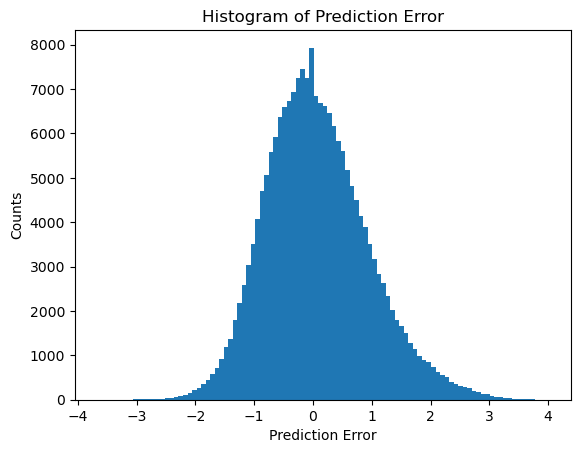

In [27]:
#print out performance
prediction_error=np.subtract(predicted_ratings,test_ratings["Rating"])
MSE=np.mean(np.square(prediction_error))
#print out MSE
print("The MSE of the model is: ",MSE)

#calculate z test statistic for check whether normally distributed with mean 0
z_stat=(np.mean(prediction_error))/np.std(prediction_error)
print("The z test statistic for this model: ",z_stat)
#z stat<1.96- hence error normally distributed

#print out histogram of prediction error
plt.hist(prediction_error,bins=100)
plt.title("Histogram of Prediction Error")
plt.xlabel("Prediction Error")
plt.ylabel("Counts")
plt.show()

